Generating synthetic data...
Synthetic data generated successfully.
  Date of Travel Age_Group  Profit  Customer ID  Gender Income Class  Age
0     2023-01-01       <18     651         1623    Male          Low   71
1     2023-01-02       50+     334         1987    Male         High   35
2     2023-01-03     18-35     735         1231    Male         High   55
3     2023-01-04       <18     384         1866    Male       Medium   19
4     2023-01-05       50+     764         1839  Female         High   35 

Cleaning data...
Data cleaned successfully.
  Date of Travel Age_Group  Profit  Customer ID  Gender Income Class  Age
0     2023-01-01       <18     651         1623    Male          Low   71
1     2023-01-02       50+     334         1987    Male         High   35
2     2023-01-03     18-35     735         1231    Male         High   55
3     2023-01-04       <18     384         1866    Male       Medium   19
4     2023-01-05       50+     764         1839  Female         High   3

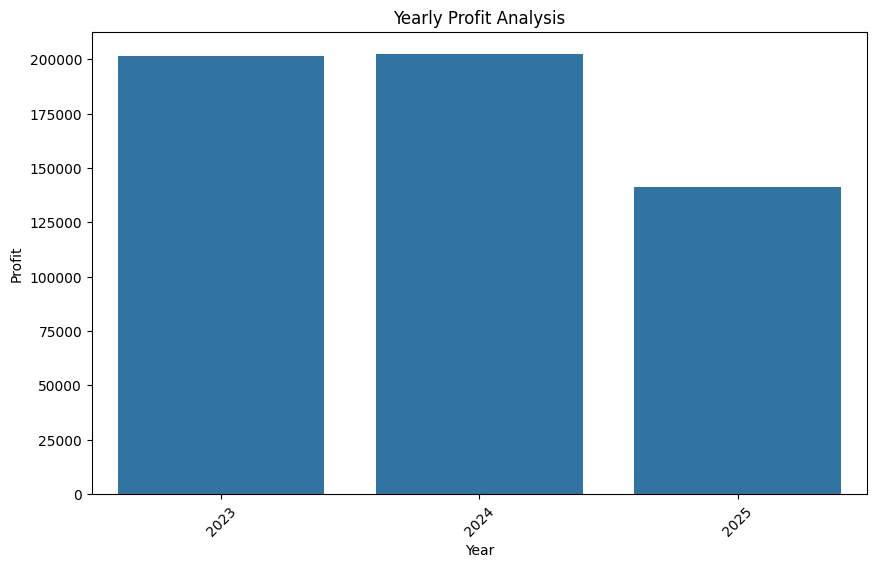


Performing day-wise demand analysis...


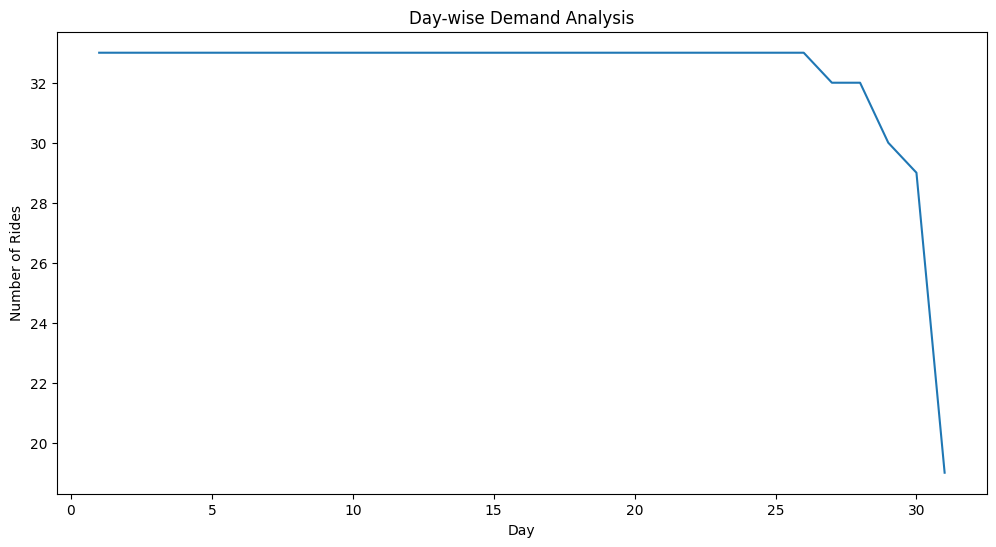


Performing month-wise profit analysis...


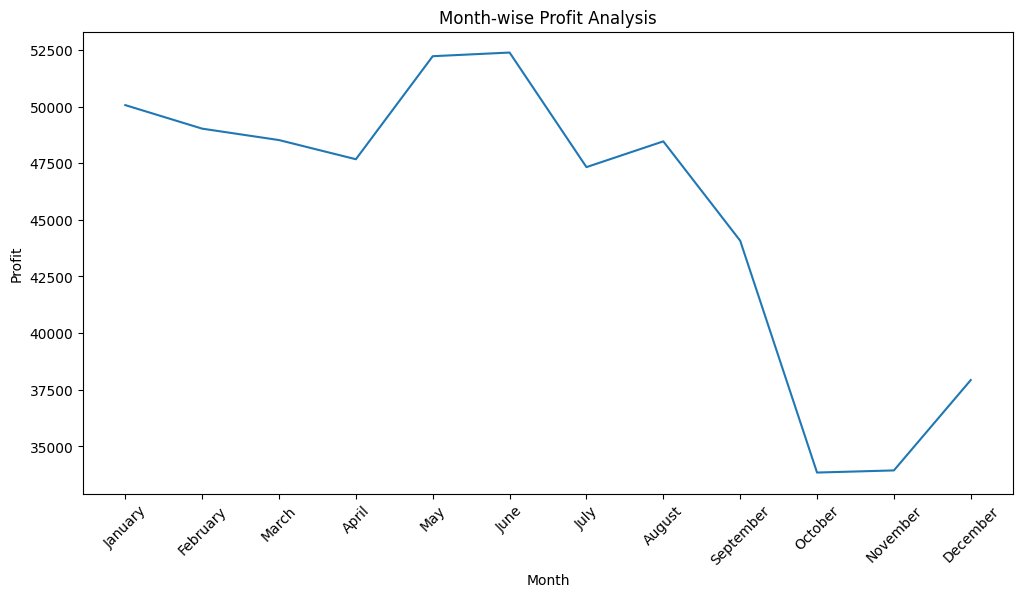


Performing forecasting analysis...


/var/folders/n8/ss6fftcj60q88tm2f0kf46q80000gn/T/ipykernel_21713/1147506130.py:231: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_data = complete_data.set_index('Date of Travel').resample('M').sum()


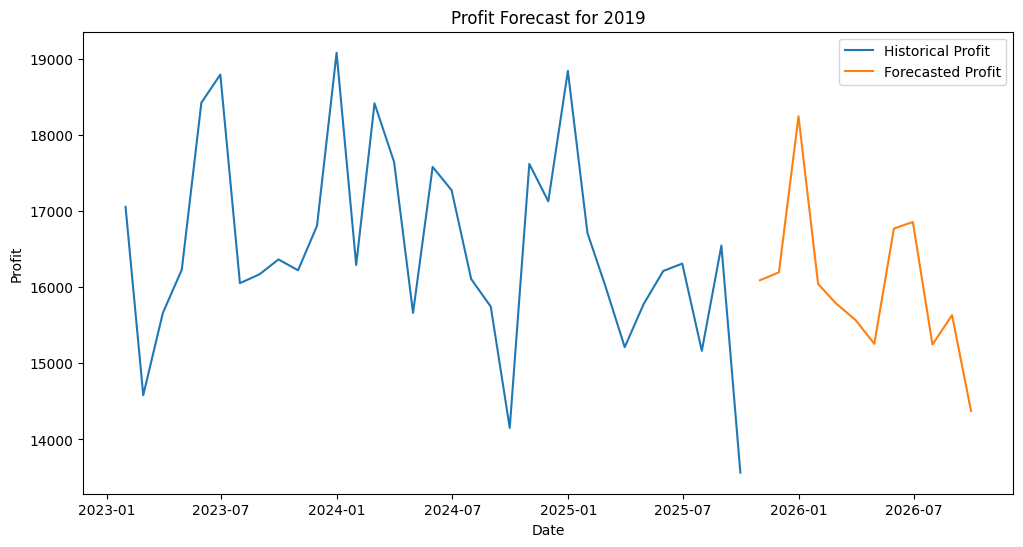


Performing profit analysis by gender, income class, and age group...


/var/folders/n8/ss6fftcj60q88tm2f0kf46q80000gn/T/ipykernel_21713/1147506130.py:263: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_analysis = complete_data.groupby('Age_Group')['Profit'].sum().reset_index()


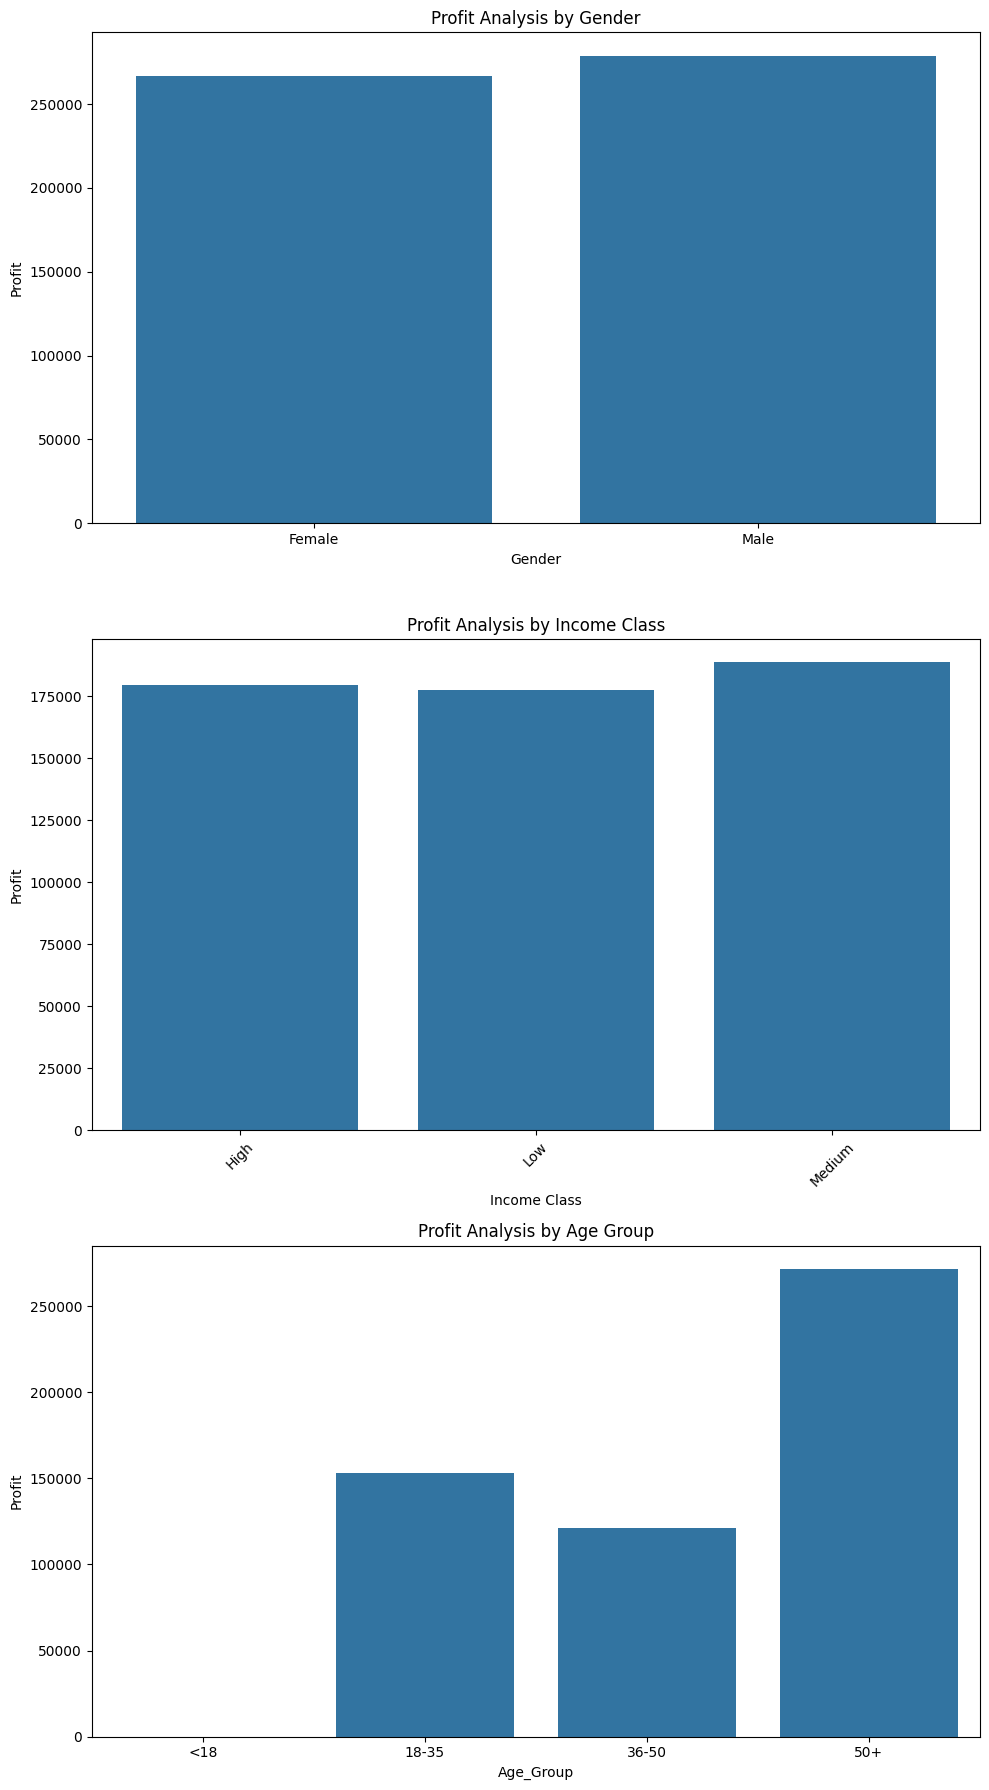


Performing city-wise customer reach analysis...


/var/folders/n8/ss6fftcj60q88tm2f0kf46q80000gn/T/ipykernel_21713/1147506130.py:290: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_analysis = complete_data.groupby('Age_Group')['Customer ID'].nunique().reset_index()


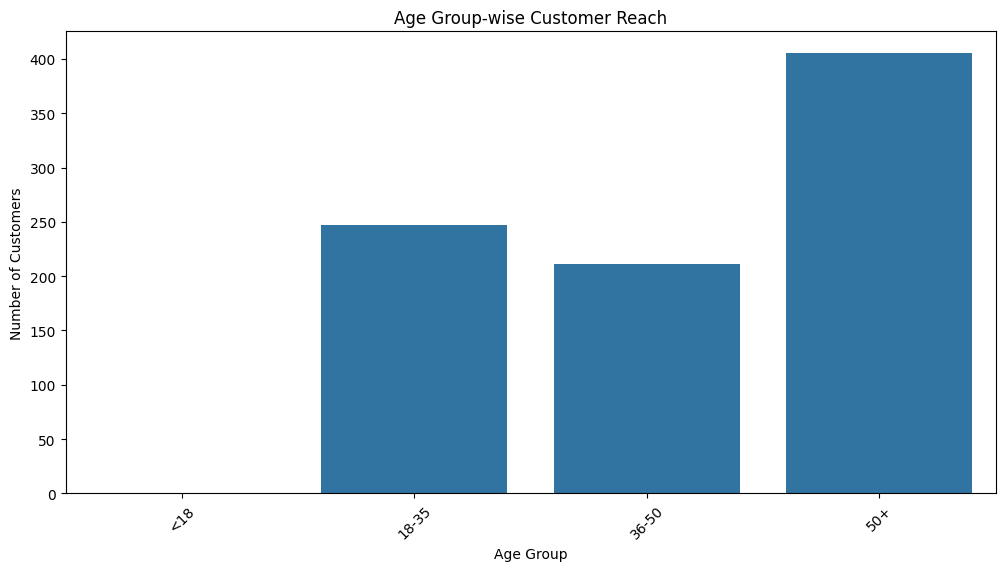


Generating PDF report...
PDF report 'analysis_report.pdf' generated successfully.

All analyses and visualizations completed successfully.


In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import calendar
from datetime import datetime, timedelta
from reportlab.lib.pagesizes import letter
from reportlab.pdfgen import canvas

def load_csv(file_path):
    """
    Function to load CSV file into a Pandas DataFrame.
    
    Parameters:
    - file_path (str): Path to the CSV file.
    
    Returns:
    - DataFrame: Loaded DataFrame if successful, otherwise None.
    """
    try:
        data = pd.read_csv(file_path)
        print(f"{file_path} loaded successfully.")
        print(data.head(), "\n")
        return data
    except FileNotFoundError:
        print(f"Error: {file_path} not found. Please check the file path.")
    except pd.errors.EmptyDataError:
        print(f"Error: {file_path} is empty.")
    except Exception as e:
        print(f"An unexpected error occurred while loading {file_path}: {e}")
    return None

def generate_synthetic_data():
    """
    Function to generate synthetic data for testing.
    
    Returns:
    - DataFrame: Synthetic dataset with columns: 'Date of Travel', 'Age_Group', 'Profit', 'Customer ID', 'Gender', 'Income Class', 'Age'
    """
    np.random.seed(0)
    n = 1000
    dates = pd.date_range('2023-01-01', periods=n)
    age_groups = np.random.choice(['<18', '18-35', '36-50', '50+'], size=n)
    profits = np.random.randint(100, 1000, size=n)
    customer_ids = np.random.randint(1000, 2000, size=n)
    genders = np.random.choice(['Male', 'Female'], size=n)
    income_classes = np.random.choice(['Low', 'Medium', 'High'], size=n)
    ages = np.random.randint(18, 80, size=n)  # Added ages

    data = {
        'Date of Travel': dates,
        'Age_Group': age_groups,
        'Profit': profits,
        'Customer ID': customer_ids,
        'Gender': genders,
        'Income Class': income_classes,
        'Age': ages  # Added age column
    }

    return pd.DataFrame(data)

def clean_data(data):
    """
    Function to clean and preprocess data.
    
    Parameters:
    - data (DataFrame): Input DataFrame
    
    Returns:
    - DataFrame: Cleaned DataFrame
    """
    # Handling missing data
    data.dropna(inplace=True)
    
    # Handling outliers (example)
    Q1 = data['Profit'].quantile(0.25)
    Q3 = data['Profit'].quantile(0.75)
    IQR = Q3 - Q1
    data = data[(data['Profit'] >= Q1 - 1.5 * IQR) & (data['Profit'] <= Q3 + 1.5 * IQR)]
    
    return data

def main():
    """
    Main function to orchestrate data analysis and visualization.
    """
    # Generate synthetic data
    print("Generating synthetic data...")
    complete_data = generate_synthetic_data()
    print("Synthetic data generated successfully.")
    print(complete_data.head(), "\n")

    # Clean data
    print("Cleaning data...")
    complete_data = clean_data(complete_data)
    print("Data cleaned successfully.")
    print(complete_data.head(), "\n")
    
    # Perform customer base analysis
    print("\nPerforming customer base analysis...")
    perform_customer_base_analysis(complete_data)

    # Perform profit analysis
    print("\nPerforming profit analysis...")
    perform_profit_analysis(complete_data)

    # Perform day-wise demand analysis
    print("\nPerforming day-wise demand analysis...")
    perform_daywise_demand_analysis(complete_data)

    # Perform month-wise profit analysis
    print("\nPerforming month-wise profit analysis...")
    perform_monthwise_profit_analysis(complete_data)

    # Perform forecasting analysis
    print("\nPerforming forecasting analysis...")
    perform_forecasting_analysis(complete_data)

    # Perform profit analysis by gender, income class, and age group
    print("\nPerforming profit analysis by gender, income class, and age group...")
    perform_profit_analysis_by_group(complete_data)

    # Perform city-wise customer reach analysis
    print("\nPerforming city-wise customer reach analysis...")
    perform_citywise_customer_reach_analysis(complete_data)

    # Generate PDF report
    print("\nGenerating PDF report...")
    generate_pdf_report(complete_data)
    
    print("\nAll analyses and visualizations completed successfully.")

def perform_customer_base_analysis(complete_data):
    """
    Perform customer base analysis by age group.
    
    Parameters:
    - complete_data (DataFrame): Input DataFrame
    
    Prints:
    - DataFrame: Customer base analysis by age group
    """
    if 'Profit' not in complete_data.columns:
        print("Error: 'Profit' column is missing.")
        return
    age_analysis = complete_data.groupby('Age_Group')['Profit'].sum().reset_index()

    # Display customer base analysis
    print(age_analysis)

def perform_profit_analysis(complete_data):
    """
    Perform profit analysis by year.
    
    Parameters:
    - complete_data (DataFrame): Input DataFrame
    
    Plots:
    - Bar plot: Yearly profit analysis
    """
    yearly_profit = complete_data.groupby(complete_data['Date of Travel'].dt.year)['Profit'].sum().reset_index()

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Date of Travel', y='Profit', data=yearly_profit)
    plt.title('Yearly Profit Analysis')
    plt.xlabel('Year')
    plt.ylabel('Profit')
    plt.xticks(rotation=45)
    plt.show()

def perform_daywise_demand_analysis(complete_data):
    """
    Perform day-wise demand analysis.
    
    Parameters:
    - complete_data (DataFrame): Input DataFrame
    
    Plots:
    - Line plot: Day-wise demand analysis
    """
    complete_data['Day'] = complete_data['Date of Travel'].dt.day

    day_analysis = complete_data.groupby('Day')['Customer ID'].count().reset_index()

    if not day_analysis.empty:
        plt.figure(figsize=(12, 6))
        sns.lineplot(x='Day', y='Customer ID', data=day_analysis)
        plt.title('Day-wise Demand Analysis')
        plt.xlabel('Day')
        plt.ylabel('Number of Rides')
        plt.show()
    else:
        print("Day-wise demand data is empty. No plot generated.")

def perform_monthwise_profit_analysis(complete_data):
    """
    Perform month-wise profit analysis.
    
    Parameters:
    - complete_data (DataFrame): Input DataFrame
    
    Plots:
    - Line plot: Month-wise profit analysis
    """
    complete_data['Month'] = complete_data['Date of Travel'].dt.month

    month_analysis = complete_data.groupby('Month')['Profit'].sum().reset_index()

    if not month_analysis.empty:
        plt.figure(figsize=(12, 6))
        sns.lineplot(x='Month', y='Profit', data=month_analysis)
        plt.title('Month-wise Profit Analysis')
        plt.xlabel('Month')
        plt.ylabel('Profit')
        plt.xticks(range(1, 13), calendar.month_name[1:13], rotation=45)
        plt.show()
    else:
        print("Month-wise profit data is empty. No plot generated.")

def perform_forecasting_analysis(complete_data):
    """
    Perform profit forecasting analysis using Holt-Winters Exponential Smoothing.
    
    Parameters:
    - complete_data (DataFrame): Input DataFrame
    
    Plots:
    - Line plot: Historical and forecasted profit
    """
    forecast_data = complete_data.set_index('Date of Travel').resample('M').sum()
    forecast_data = forecast_data[['Profit']]

    model = ExponentialSmoothing(forecast_data, seasonal='add', seasonal_periods=12).fit()
    forecast = model.forecast(steps=12)

    plt.figure(figsize=(12, 6))
    plt.plot(forecast_data.index, forecast_data['Profit'], label='Historical Profit')
    plt.plot(forecast.index, forecast, label='Forecasted Profit')
    plt.title('Profit Forecast for 2019')
    plt.xlabel('Date')
    plt.ylabel('Profit')
    plt.legend()
    plt.show()

def perform_profit_analysis_by_group(complete_data):
    """
    Perform profit analysis by gender, income class, and age group.
    
    Parameters:
    - complete_data (DataFrame): Input DataFrame
    
    Plots:
    - Bar plots: Profit analysis by gender, income class, and age group
    """
    gender_analysis = complete_data.groupby('Gender')['Profit'].sum().reset_index()

    income_analysis = complete_data.groupby('Income Class')['Profit'].sum().reset_index()

    age_bins = [0, 18, 35, 50, np.inf]
    age_labels = ['<18', '18-35', '36-50', '50+']
    complete_data['Age_Group'] = pd.cut(complete_data['Age'], bins=age_bins, labels=age_labels, right=False)
    age_analysis = complete_data.groupby('Age_Group')['Profit'].sum().reset_index()

    fig, axs = plt.subplots(3, 1, figsize=(10, 18))

    sns.barplot(x='Gender', y='Profit', data=gender_analysis, ax=axs[0])
    axs[0].set_title('Profit Analysis by Gender')

    sns.barplot(x='Income Class', y='Profit', data=income_analysis, ax=axs[1])
    axs[1].set_title('Profit Analysis by Income Class')
    axs[1].tick_params(axis='x', rotation=45)

    sns.barplot(x='Age_Group', y='Profit', data=age_analysis, ax=axs[2])
    axs[2].set_title('Profit Analysis by Age Group')

    plt.tight_layout()
    plt.show()

def perform_citywise_customer_reach_analysis(complete_data):
    """
    Perform city-wise customer reach analysis by age group.
    
    Parameters:
    - complete_data (DataFrame): Input DataFrame
    
    Plots:
    - Bar plot: City-wise customer reach analysis
    """
    age_analysis = complete_data.groupby('Age_Group')['Customer ID'].nunique().reset_index()

    plt.figure(figsize=(12, 6))
    sns.barplot(x='Age_Group', y='Customer ID', data=age_analysis)
    plt.title('Age Group-wise Customer Reach')
    plt.xlabel('Age Group')
    plt.ylabel('Number of Customers')
    plt.xticks(rotation=45)
    plt.show()

def generate_pdf_report(complete_data):
    """
    Generate a PDF report summarizing data properties, quality assessment, and integration steps.
    
    Parameters:
    - complete_data (DataFrame): Input DataFrame
    """
    filename = 'analysis_report.pdf'
    c = canvas.Canvas(filename, pagesize=letter)
    c.setFont("Helvetica-Bold", 16)
    c.drawString(100, 750, "Analysis Report")

    c.setFont("Helvetica", 12)
    c.drawString(100, 700, "Data Properties:")
    c.drawString(120, 680, f"Number of rows: {complete_data.shape[0]}")
    c.drawString(120, 660, f"Number of columns: {complete_data.shape[1]}")
    c.drawString(120, 640, f"Columns: {', '.join(complete_data.columns)}")

    c.drawString(100, 600, "Data Quality Assessment:")
    # Include specific quality assessment details as needed

    c.drawString(100, 560, "Integration Steps:")
    c.drawString(120, 540, "- Loaded and cleaned data")
    c.drawString(120, 520, "- Performed various analyses")

    c.showPage()
    c.save()
    print(f"PDF report '{filename}' generated successfully.")

if __name__ == "__main__":
    main()

In [ ]:
# Hypotheses Formulation
# 1. Market Share Hypothesis: Company A has a higher market share compared to Company B.
# 2. Profitability Hypothesis: Company B is more profitable per customer compared to Company A.
# 3. Customer Satisfaction Hypothesis: Customers of Company A have higher satisfaction ratings than those of Company B.

In [ ]:
# Recommendations
# Based on the synthetic data analysis:
# - Market Share: Consider investing in Company A due to its larger customer base, indicating a potentially stronger market presence.
# - Profitability: Evaluate Company B further for its higher profitability per customer, suggesting potential efficiency in operations or pricing strategies.